# 逻辑回归

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"C:\Windows\fonts\msyh.ttc",size=10)

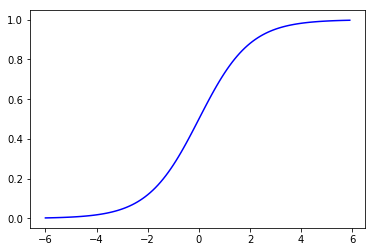

In [5]:
#画逻辑函数的图 横坐标X是解释变量的线性组合 
X = np.arange(-6,6,0.1)
y = 1/(1+ np.exp(-X))
plt.plot(X,y,'b-')

# 垃圾邮件分类
TF-IDF算法抽取短信的特征向量

In [22]:
import pandas as pd
df = pd.read_csv('SMSSpamCollection',sep='\t',header=None)
print(df.head())
df[0].value_counts()

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


ham     4825
spam     747
Name: 0, dtype: int64

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split

In [30]:
X_train_raw,X_test_raw,y_train,y_test =train_test_split(df[1],df[0])

In [39]:
#建一个TfidfVectorizer实例来计算TF-IDF权重
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)       ########test只能用transfrom(),不能用fit_transform(),否则抽取的特征数目不一样

In [41]:
#LogisticRegression实例来训练模型
classfier = LogisticRegression()
classfier.fit(X_train,y_train)
predictions = classfier.predict(X_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [43]:
for i,prediction in enumerate(predictions[-5:]):
    print('预测类型：%s, 信息：%s' %(prediction,X_test_raw.iloc[i]))

预测类型：ham, 信息：Loans for any purpose even if you have Bad Credit! Tenants Welcome. Call NoWorriesLoans.com on 08717111821
预测类型：ham, 信息：Watching cartoon, listening music &amp; at eve had to go temple &amp; church.. What about u?
预测类型：ham, 信息：Alright we'll bring it to you, see you in like  &lt;#&gt;  mins
预测类型：ham, 信息：A bloo bloo bloo I'll miss the first bowl
预测类型：ham, 信息：I'm tired of arguing with you about this week after week. Do what you want and from now on, i'll do the same.


# 二元分类效果评估方法
准确率（accuracy），精确率（precision）和召回率（recall）三项指标，以及综合评价指标（F1 measure）， ROC AUC值（Receiver Operating Characteristic ROC，Area Under Curve，AUC）

[[4 1]
 [2 3]]


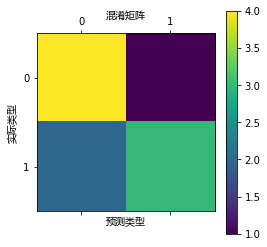

In [48]:
#混淆矩阵描述真假与阴阳的关系
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)  #对角线上的值尽量高
plt.matshow(confusion_matrix)
plt.colorbar()
plt.title('混淆矩阵',fontproperties=font)
plt.ylabel('实际类型',fontproperties=font)
plt.xlabel('预测类型',fontproperties=font)

In [49]:
from sklearn.metrics import accuracy_score
y_pred, y_true = [0, 1, 1, 0], [1, 1, 1, 1]
accuracy_score(y_pred,y_true)

0.5

In [54]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(classfier,X_train,y_train,cv=5)
print(scores, np.mean(scores))
#score代表准确率 预测正确的数目

[ 0.95813397  0.95215311  0.95215311  0.95574163  0.96407186] 0.956450734894


In [73]:

df = pd.read_csv('SMSSpamCollection',sep='\t',header=None)
df = df.rename(columns={0:'label',1:'message'})
def label_cvt(x):
    if x =='ham':
        return 0
    if x=='spam':
        return 1
df['label'] = df['label'].apply(label_cvt)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
scores = cross_val_score(classfier,X_train,y_train,cv=5,scoring='precision')
print('精确率：',scores, np.mean(scores))
scores = cross_val_score(classfier,X_train,y_train,cv=5,scoring='recall')
print('召回率：',scores, np.mean(scores))
#分类器精确率99.2%，分类器预测出的垃圾短信中99.2%都是真的垃圾短信。召回率比较低67.2%，就是说真实的垃圾短信中，32.8%被当作正常短信了，
#没有被识别出来。这些数据会不断变化，因为训练集和测试集是随机抽取的

精确率： [ 1.          1.          0.98648649  1.          1.        ] 0.997297297297
召回率： [ 0.59633028  0.55045872  0.66972477  0.68807339  0.74074074] 0.649065579341


In [78]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print('综合评价指标：', np.mean(f1s), f1s)

综合评价指标： 0.784256207424 [ 0.74712644  0.71005917  0.79781421  0.81521739  0.85106383]


[[ 0.95570052  0.04429948]
 [ 0.98580328  0.01419672]
 [ 0.98013058  0.01986942]
 ..., 
 [ 0.97953904  0.02046096]
 [ 0.96427817  0.03572183]
 [ 0.95328356  0.04671644]]
roc_auc: 0.992341308378


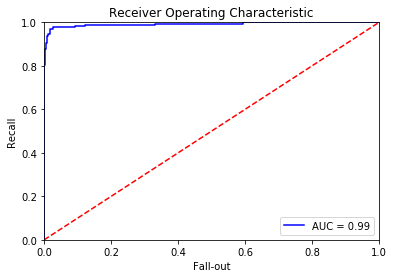

In [108]:
from sklearn.metrics import roc_curve,auc
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict_proba(X_test) #两列 一列表示为1的概率，一列表示0的概率
print (predictions)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate,recall)
print('roc_auc:',roc_auc)
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'r--')

# 网格搜索 scikit-learn有GridSearchCV()函数
GridSearchCV()函数的参数有待评估模型pipeline，超参数词典parameters和效果评价指标scoring。n_jobs是指并发进程最大数量，设置为-1表示使用所有CPU核心进程。在Python3.4中，可以写一个Python的脚本，让fit()函数可以在main()函数里调用，也可以在Python自带命令行,IPython命令行和IPython Notebook运行。经过网格计算后的超参数在训练集中取得了很好的效果。

In [109]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.pipeline import Pipeline #在文本特征提取用

In [116]:
pipeline = Pipeline([('vect',TfidfVectorizer(stop_words='english')),('clf',LogisticRegression())])
parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, 10000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2'),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.01, 0.1, 1, 10),
}
grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1,verbose=1,scoring='accuracy',cv=3)
X, y, = df['message'], df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)
grid_search.fit(X_train,y_train)



Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  4.0min finished


最佳效果：0.983


In [131]:
print('最佳效果：%0.3f' %grid_search.best_score_)
print ('最优参数组合：')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s:%r'%(param_name,best_parameters[param_name]))
    
predictions = grid_search.predict(X_test)
print('准确率:',accuracy_score(y_test,predictions))
print('精确率：', precision_score(y_test, predictions))
print('召回率：', recall_score(y_test, predictions))

最佳效果：0.983
最优参数组合：
	clf__C:10
	clf__penalty:'l2'
	vect__max_df:0.5
	vect__max_features:2500
	vect__ngram_range:(1, 2)
	vect__norm:'l2'
	vect__stop_words:None
	vect__use_idf:True
准确率: 0.988513998564
精确率： 0.994047619048
召回率： 0.917582417582


# 多类分类 sklearn的one-vs.-all或者one-vs.-the-rest方法
以影评为例


In [138]:
import zipfile
df = pd.read_csv('train.tsv',header=0,sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [142]:
df.count()
df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [143]:
df.Sentiment.value_counts()/df.Sentiment.count()
#近51%都是评价为2中等（neutral）的电影
#可见，在这个问题里，准确率不是一个有信息量的评价指标，因为即使很烂的分类器预测出中等水平的结果，其准确率也是51%

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

In [144]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [149]:
pipeline = Pipeline([('vect',TfidfVectorizer(stop_words='english')),('clf',LogisticRegression())])
parameters = {
    'vect__max_df': (0.25, 0.5),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'clf__C': (0.1, 1, 10),
}
X,y = df['Phrase'],df['Sentiment'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
grid_search = GridSearchCV(pipeline,parameters,n_jobs=3,verbose=1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   40.5s
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'vect__max_df': (0.25, 0.5), 'vect__ngram_range': ((1, 1), (1, 2)), 'vect__use_idf': (True, False), 'clf__C': (0.1, 1, 10)},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [150]:
print('最佳效果：%0.3f' % grid_search.best_score_)
print('最优参数组合：')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

最佳效果：0.618
最优参数组合：
	clf__C: 10
	vect__max_df: 0.25
	vect__ngram_range: (1, 2)
	vect__use_idf: False


In [154]:
predictions = grid_search.predict(X_test)
print('准确率：', accuracy_score(y_test, predictions))
print('混淆矩阵：\n', confusion_matrix(y_test, predictions))
print('分类报告：\n', classification_report(y_test, predictions))

准确率： 0.636473151352
混淆矩阵：
 [[ 1116  1741   689    72     5]
 [  935  5981  6216   536    39]
 [  233  3142 32643  3564   165]
 [   26   404  6431  8232  1266]
 [    5    28   521  2348  1692]]
分类报告：
              precision    recall  f1-score   support

          0       0.48      0.31      0.38      3623
          1       0.53      0.44      0.48     13707
          2       0.70      0.82      0.76     39747
          3       0.56      0.50      0.53     16359
          4       0.53      0.37      0.44      4594

avg / total       0.62      0.64      0.62     78030



# 多标签分类和问题转换